## Init

In [1]:
%matplotlib inline
import sys
import os
import pandas as pd
import math
from time import sleep

In [2]:
import logging
logging.basicConfig(stream=sys.stdout, level=logging.INFO,
                    format="[%(name)s:%(levelname)-8s] -> %(message)s")
logger = logging.getLogger()

In [3]:
pvpath = r"C:\inicio_dev\pyverify"
if os.path.exists(pvpath):
    sys.path.insert(0, pvpath)

In [4]:
from pverify.drivers.TemperatureChamber.temptronic_ats_tp import temptronic_ats_tp

In [5]:
thermo = temptronic_ats_tp(logger=logger)

In [6]:
thermo.Initialize("GPIB0::9::INSTR", 1, 1, "")

[root:INFO    ] -> Successfully connected to thermostream TEMPTRONIC,ATS-545,0,PG20004B
 @ GPIB0::9::INSTR


In [7]:
logger.info(thermo)

[root:INFO    ] -> Thermostream Limits:
    TEMP_HIGH = 225.0   # °C
    TEMP_LOW = -75.0    # °C
    FLOW_HIGH = 8.5     # unit: l/s -> 18 scfm  NOT SUPPORTED (ToDo: Check)
    FLOW_LOW = 1.9      # unit: l/s -> 4 scfm  NOT SUPPORTED (ToDo: Check)
    WINDOW_HIGH = 9.9   # unit: °C
    WINDOW_LOW = 0.1    # unit: °C
    RATE_HIGH = 9999    # °C/minute
    RATE_LOW = 0        # °C/minute



## Identity Feature

In [8]:
logger.info("IDN:     " + thermo.Identity.Identifier)
logger.info("FW REV:  " + thermo.Identity.InstrumentFirmwareRevision)
logger.info("DRV REV: " + thermo.Identity.Revision)

[root:INFO    ] -> IDN:     TEMPTRONIC,ATS-545,0,PG20004B
[root:INFO    ] -> FW REV:  PG20004B
[root:INFO    ] -> DRV REV: not available


## Temperature Logger

In [9]:
logpath = r"C:\temp\templog.csv"
thermo.Templogger.config(logpath, 0.1)

In [10]:
thermo.Templogger.start()
sleep(1)
thermo.Templogger.pause()
sleep(0.5)
thermo.Templogger.start()
sleep(1)
thermo.Templogger.stop()

In [11]:
thermo.Templogger.as_dataframe()

,AirTemp,DutTemp
Date,,
2019-08-12 11:35:55.910630,1.4,0.0
2019-08-12 11:35:56.056674,1.5,0.0
2019-08-12 11:35:56.195690,1.5,0.0
2019-08-12 11:35:56.495654,1.5,0.0
2019-08-12 11:35:56.637265,1.5,0.0
2019-08-12 11:35:56.779369,1.5,0.0


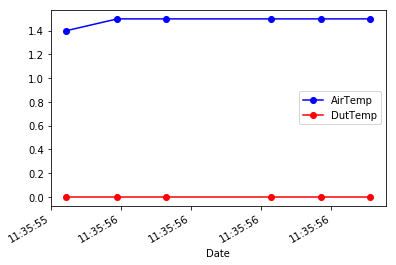

In [12]:
df = thermo.Templogger.as_dataframe()
df.plot(style=dict(AirTemp="bo-", DutTemp="ro-"))

## Properties

In [13]:
# MODE

try:
    thermo.parameter.Mode = thermo.Enums.MODE.TC_METER
except NotImplementedError as e:
    logger.info(e, exc_info=False)
else:
    mode3 = thermo.parameter.Mode
    logger.info(mode3)
    assert mode3 == thermo.Enums.MODE.TC_METER

[root:INFO    ] -> Setting control to TC-Meter is only supported with ATS700 or ATS800 series!


In [31]:
thermo.parameter.Mode = thermo.Enums.MODE.AIR_CTRL
mode1 = thermo.parameter.Mode
logger.info(mode1)
assert mode1 == thermo.Enums.MODE.AIR_CTRL

[root:INFO    ] -> MODE.AIR_CTRL


In [32]:
thermo.parameter.Sensor = thermo.Enums.SENSOR.K
mode3 = thermo.parameter.Sensor
logger.info(mode3)
assert mode3 == thermo.Enums.SENSOR.K

[root:INFO    ] -> SENSOR.K


In [33]:
thermo.parameter.Sensor = thermo.Enums.SENSOR.NONE
mode3 = thermo.parameter.Sensor
logger.info(mode3)
assert mode3 == thermo.Enums.SENSOR.NONE

[root:INFO    ] -> SENSOR.NONE


In [38]:
thermo.parameter.Sensor = thermo.Enums.SENSOR.K
mode3 = thermo.parameter.Sensor
logger.info(mode3)
assert mode3 == thermo.Enums.SENSOR.K

[root:INFO    ] -> SENSOR.K


In [35]:
thermo.parameter.Mode = thermo.Enums.MODE.DUT_CTRL
mode5 = thermo.parameter.Mode
logger.info(mode5)
assert mode5 == thermo.Enums.MODE.DUT_CTRL

[root:INFO    ] -> MODE.DUT_CTRL


In [36]:
thermo.parameter.Sensor = thermo.Enums.SENSOR.T
mode3 = thermo.parameter.Sensor
logger.info(mode3)
assert mode3 == thermo.Enums.SENSOR.T

[root:INFO    ] -> SENSOR.T


In [37]:
thermo.parameter.Sensor = thermo.Enums.SENSOR.NONE
mode3 = thermo.parameter.Sensor
logger.info(mode3)
assert mode3 == thermo.Enums.SENSOR.NONE

[root:INFO    ] -> SENSOR.NONE


In [25]:
thermo.parameter.Sensor

<SENSOR.NONE: 0>

In [17]:
# Temperature

logger.info("Dut Temperature: %.2f" % thermo.parameter.DutTemp)
logger.info("Air Temperature: %.2f" % thermo.parameter.AirTemp)

thermo.parameter.Mode = thermo.Enums.MODE.DUT_CTRL
logger.info("Dut Temperature: %.2f" % thermo.parameter.Temp)
thermo.parameter.Mode = thermo.Enums.MODE.AIR_CTRL
logger.info("Air Temperature: %.2f" % thermo.parameter.Temp)

[root:INFO    ] -> Dut Temperature: 23.80
[root:INFO    ] -> Air Temperature: 26.30
[root:INFO    ] -> Dut Temperature: 23.80
[root:INFO    ] -> Air Temperature: 26.30


In [18]:
# Setpoint

thermo.parameter.SetPoint = 50
rb = thermo.parameter.SetPoint
logger.info(rb)
assert rb == 50

[root:INFO    ] -> 50.0


In [19]:
# Window

thermo.parameter.Window = 2
rb = thermo.parameter.Window
logger.info(rb)
assert rb == 2

[root:INFO    ] -> 2.0


In [20]:
# RampRate

thermo.parameter.RampRate = 100
rb = thermo.parameter.RampRate
logger.info(rb)
assert rb == 100

[root:INFO    ] -> 100.0


In [21]:
thermo.parameter.RampRate = 9999  # As fast as possible
rb = thermo.parameter.RampRate
logger.info(rb)
assert rb == 9999

[root:INFO    ] -> 9999.0


In [8]:
# FlowRate

try:
    thermo.parameter.FlowRate = 5
except NotImplementedError as e:
    logger.info(e, exc_info=False)
else:
    rb = thermo.parameter.FlowRate
    logger.info(rb)
    assert math.ceil(rb) == 5

[root:INFO    ] -> Setting the flow rate is only supported with ATS700 or ATS800 series!


In [23]:
# HeadLock

try:
    thermo.parameter.HeadLock = True
except NotImplementedError as e:
    logger.info(e, exc_info=False)
else:
    rb = thermo.parameter.HeadLock
    logger.info(rb)
    assert rb == True

    thermo.parameter.HeadLock = False
    rb = thermo.parameter.HeadLock
    logger.info(rb)
    assert rb == False

[root:INFO    ] -> Locking the head is only supported with ATS700 or ATS800 series!


In [24]:
# HeadPosition

thermo.parameter.HeadPosition = thermo.Enums.HEAD_POS.UP
rb = thermo.parameter.HeadPosition
logger.info(rb)
assert rb == thermo.Enums.HEAD_POS.UP

[root:INFO    ] -> HEAD_POS.UP


In [25]:
thermo.parameter.HeadPosition = thermo.Enums.HEAD_POS.DOWN
rb = thermo.parameter.HeadPosition
logger.info(rb)
assert rb == thermo.Enums.HEAD_POS.DOWN

[root:INFO    ] -> HEAD_POS.DOWN


In [26]:
# FlowState

thermo.parameter.FlowState = True
rb = thermo.parameter.FlowState
logger.info(rb)
assert rb == True

thermo.parameter.FlowState = False
rb = thermo.parameter.FlowState
logger.info(rb)
assert rb == False

[root:INFO    ] -> True
[root:INFO    ] -> False


In [ ]:
# CompressorState

thermo.parameter.CompressorState = True
rb = thermo.parameter.CompressorState
logger.info(rb)
assert rb == True

thermo.parameter.CompressorState = False
rb = thermo.parameter.CompressorState
logger.info(rb)
assert rb == False

thermo.parameter.CompressorState = True
rb = thermo.parameter.CompressorState
logger.info(rb)
assert rb == True

[root:INFO    ] -> True
[root:INFO    ] -> False


In [ ]:
# CompressorTimer

try:
    thermo.parameter.CompressorTimer = 15
except NotImplementedError as e:
    logger.info(e, exc_info=False)
else:
    rb = thermo.parameter.CompressorTimer
    logger.info(rb)
    assert rb == 14 or rb == 15

    thermo.parameter.CompressorTimer = 0
    rb = thermo.parameter.CompressorTimer
    logger.info(rb)
    assert rb == 0

    logger.info(thermo.parameter.CompressorTimerRemaining)

## Wait until temperature settled

[root:WARNING ] -> Setting the flow rate is only supported with ATS700 or ATS800 series!
[root:INFO    ] ->   0% of wait time has passed. Cur: 22.2°C	Target: -25.0°C.
[root:INFO    ] -> Temperature is within range. Soaking for 0.25 minute(s)...
[root:INFO    ] ->   0% of soaktime has passed.
[root:INFO    ] ->  20% of soaktime has passed.
[root:INFO    ] ->  40% of soaktime has passed.
[root:INFO    ] ->  60% of soaktime has passed.
[root:INFO    ] ->  80% of soaktime has passed.
[root:INFO    ] -> 100% of soaktime has passed.
[root:INFO    ] -> Finished soaking. Moving on...


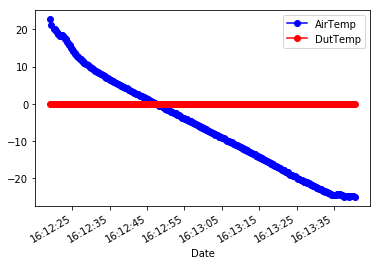

In [36]:
thermo.parameter.Mode = thermo.Enums.MODE.AIR_CTRL
thermo.parameter.HeadPosition = thermo.Enums.HEAD_POS.DOWN
thermo.Templogger.config(logpath, 0.1)
thermo.Templogger.start()
try:
    thermo.WaitForTemp(timeout_s=600, target=-25., window_k=5, flowrate=5., soaktime_m=0.25, disable_exception=False)
except Exception as e:
    logger.exception(e)
finally:
    thermo.Templogger.stop()
    thermo.parameter.FlowState = False
    df = thermo.Templogger.as_dataframe()
    df.plot(style=dict(AirTemp="bo-", DutTemp="ro-"))

## Close

In [ ]:
thermo.Close()